# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [140]:
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['target_names'] = data['target'].apply(lambda x: iris.target_names[x])
print(data.shape)
data.head()

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [141]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data[iris.feature_names], data['target'], test_size=0.3, random_state=3)
print(train_X.shape)
train_X.head()

(105, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
51,6.4,3.2,4.5,1.5
23,5.1,3.3,1.7,0.5
83,6.0,2.7,5.1,1.6
142,5.8,2.7,5.1,1.9
84,5.4,3.0,4.5,1.5


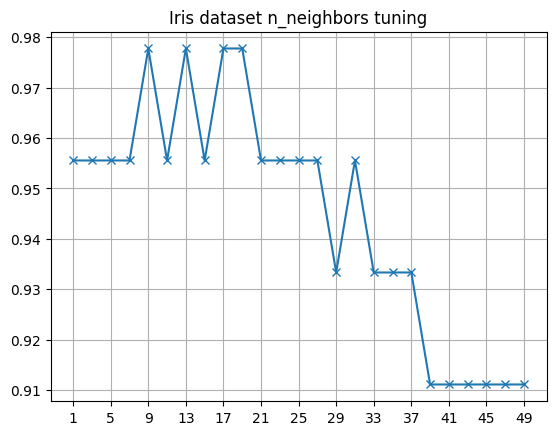

In [142]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
ks = list(range(1, 50, 2))
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    scores.append(knn.score(test_X, test_y))
    
plt.plot(ks, scores, marker='x')
plt.xticks(ks[::2])
plt.grid()
plt.title('Iris dataset n_neighbors tuning');

In [143]:
score_best = max(scores)
k_best = ks[scores.index(score_best)]
print ('The best k = {} , score = {}'.format(k_best, score_best))

The best k = 9 , score = 0.9777777777777777


## Synthetic dataset  

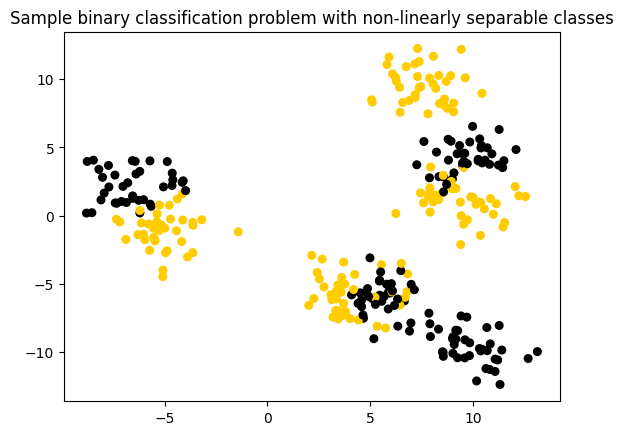

In [144]:
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFCC00', 'black'])

X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8, 
                        cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.title('Sample binary classification problem with non-linearly separable classes');

In [145]:
from sklearn.model_selection import train_test_split

print(X_D2.shape, y_D2.shape, end='\n\n')

train_X, test_X, train_y, test_y = train_test_split(X_D2, y_D2, test_size=0.3, random_state=0)

print(train_X.shape)
print(train_X[:5])
train_y.shape, train_y[:10]

(300, 2) (300,)

(210, 2)
[[ 6.58493535  8.3005597 ]
 [ 8.07234454 11.69290799]
 [-3.98339421  1.83451486]
 [ 7.90541338 -7.93247079]
 [11.54066181 -0.50201082]]


((210,), array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int32))

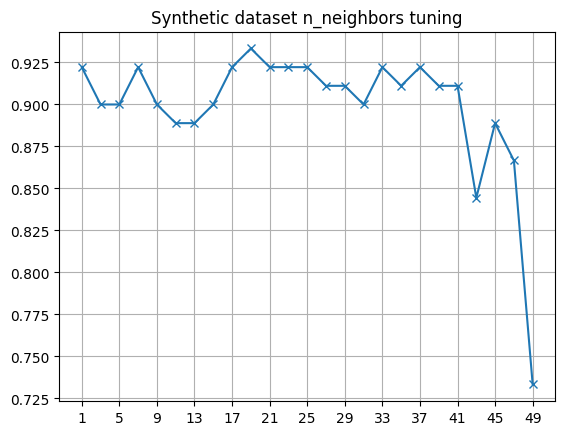

In [146]:
synt_scores = []
synt_ks = list(range(1, 50, 2))
for k in synt_ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    synt_scores.append(knn.score(test_X, test_y))
    
plt.plot(synt_ks, synt_scores, marker='x')
plt.xticks(synt_ks[::2])
plt.grid()
plt.title('Synthetic dataset n_neighbors tuning');

In [147]:
synt_score_best = max(synt_scores)
synt_k_best = synt_ks[synt_scores.index(synt_score_best)]
print ('The best k = {} , score = {}'.format(synt_k_best, synt_score_best))

The best k = 19 , score = 0.9333333333333333


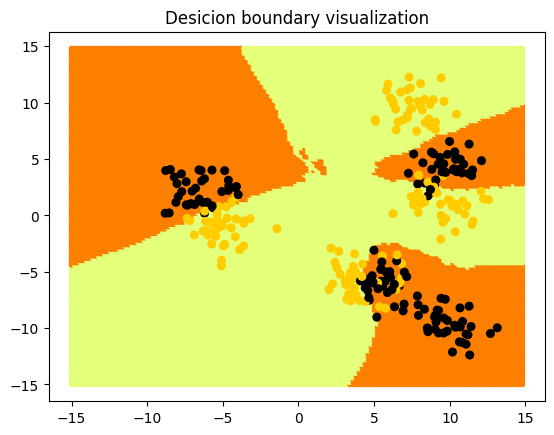

In [148]:
# visualize decision boundary

knn = KNeighborsClassifier(synt_k_best)
knn.fit(train_X, train_y)

field_range = np.arange(-15, 15, 0.2)
xv, yv = np.meshgrid(field_range, field_range)
field_points = list(zip(xv.flatten(), yv.flatten()))

field_preds = knn.predict(field_points)

plt.scatter(xv, yv, c=field_preds, marker='.', cmap='Wistia')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.title('Desicion boundary visualization');